## 二分模板 29. 两数相除 : 二分 + 倍增乘法解法

# 二分本质 & 恢复二段性处理

## 33. 搜索旋转排序数组（找目标值） : 严格 O(logN)，一起看清二分的本质

## 81. 搜索旋转排序数组 II（找目标值） : 详解为何元素相同会导致 O(n)，一起看清二分的本质

## 153. 寻找旋转排序数组中的最小值（找最小值） : 严格 O(logN)，一起看清二分的本质

## 154. 寻找旋转排序数组中的最小值 II（找最小值） : 详解为何元素相同会导致 O(n)，一起看清二分的本质

# 二分 check 函数如何确定

## 34. 在排序数组中查找元素的第一个和最后一个位置 : 考察对「二分」的理解，以及 check 函数的「大于 小于」怎么写

## 1011. 在 D 天内送达包裹的能力
传送带上的包裹必须在 D 天内从一个港口运送到另一个港口。

传送带上的第 i 个包裹的重量为 weights[i]。每一天，我们都会按给出重量的顺序往传送带上装载包裹。我们装载的重量不会超过船的最大运载重量。

返回能在 D 天内将传送带上的所有包裹送达的船的最低运载能力。

 

示例 1：
```
输入：weights = [1,2,3,4,5,6,7,8,9,10], D = 5
输出：15
解释：
船舶最低载重 15 就能够在 5 天内送达所有包裹，如下所示：
第 1 天：1, 2, 3, 4, 5
第 2 天：6, 7
第 3 天：8
第 4 天：9
第 5 天：10

请注意，货物必须按照给定的顺序装运，因此使用载重能力为 14 的船舶并将包装分成 (2, 3, 4, 5), (1, 6, 7), (8), (9), (10) 是不允许的。 
```
示例 2：
```
输入：weights = [3,2,2,4,1,4], D = 3
输出：6
解释：
船舶最低载重 6 就能够在 3 天内送达所有包裹，如下所示：
第 1 天：3, 2
第 2 天：2, 4
第 3 天：1, 4
```
示例 3：
```
输入：weights = [1,2,3,1,1], D = 4
输出：3
解释：
第 1 天：1
第 2 天：2
第 3 天：3
第 4 天：1, 1
``` 

提示：
```
1 <= D <= weights.length <= 50000
1 <= weights[i] <= 500
````

### 二分解法（精确边界）

假定「D 天内运送完所有包裹的最低运力」为 ans，那么在以 ans 为分割点的数轴上具有「二段性」：

- 数值范围在 $(-\infty, ans)$ 的运力必然「不满足」 D 天内运送完所有包裹的要求
- 数值范围在 $[ans, +\infty)$ 的运力必然「满足」 D天内运送完所有包裹的要求

<b>即我们可以通过「二分」来找到恰好满足 D天内运送完所有包裹的分割点 ans。</b>

接下来我们要确定二分的范围，由于不存在包裹拆分的情况，考虑如下两种边界情况：

- 理论最低运力：只确保所有包裹能够被运送，自然也包括重量最大的包裹，此时理论最低运力为 max，max 为数组 weights 中的最大值
- 理论最高运力：使得所有包裹在最短时间（一天）内运算完成，此时理论最低运力为 sum，sum 为数组 weights 的总和


In [1]:
from typing import List
class Solution:
    def shipWithinDays(self, weights: List[int], D: int) -> int:
        l, r = max(max(weights), sum(weights)//D), sum(weights)
        while l < r:
            mid = (l + r) >> 1
            if self.check(weights, mid, D):
                r = mid
            else:
                l = mid + 1
        return r
    
    def check(self, W, cap, d):
        n = len(W)
        i = cnt = 1
        total = W[0]
        while i < n:
            while i < n and total + W[i] <= cap:
                total += W[i]
                i += 1
            cnt += 1
            total = 0
        return cnt - 1 <= d

In [2]:
ss = Solution()
res1 = ss.shipWithinDays(weights = [1,2,3,4,5,6,7,8,9,10], D = 5)
res2 = ss.shipWithinDays(weights = [3,3,3,3,3,3], D = 2)
res3 =  ss.shipWithinDays(weights = [1,2,3,4,5,6,7,8,9,10] , D = 1)    # 55
print(res1)
print(res2)
print(res3)

15
9
55


## 938. 二叉搜索树的范围和
给定二叉搜索树的根结点 root，返回值位于范围 $[low, high]$ 之间的所有结点的值的和。求出所有 X >= L 且 X <= R 的值的和.

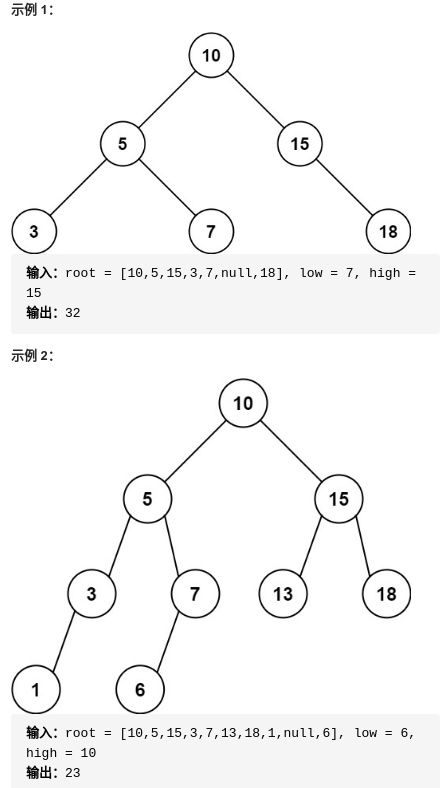

- 标签：深度优先遍历
- 递归终止条件：
  - 当前节点为 null 时返回 0
  - 当前节点 X < L 时则返回右子树之和
  - 当前节点 X > R 时则返回左子树之和
  - 当前节点 X >= L 且 X <= R 时则返回：当前节点值 + 左子树之和 + 右子树之和
- 注意点：通过判断X的大小能够避免遍历全部树的节点，比如下方的动图中，3 这个值就没有必要遍历

In [39]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
    def __str__(self):
        return f'<{self.val}, {self.left}, {self.right}>'
    
class Solution:
    def rangeSumBST(self, root: TreeNode, low: int, high: int) -> int:
        if root == None:
            return 0
        if root.val < low:
            return self.rangeSumBST(root.right, low, high)
        if root.val > high:
            return self.rangeSumBST(root.left, low, high)
       
        return root.val + self.rangeSumBST(root.left, low, high) + self.rangeSumBST(root.right, low, high)

In [40]:
from collections import deque
def create_BST(nums):
    if len(nums) == 0:
        return None
    n = iter(nums)
    tree = TreeNode(next(n))
    fringe = deque([tree])
    while True:
        head = fringe.popleft()
        try:
            head.left = TreeNode(next(n))
            fringe.append(head.left)
            head.right = TreeNode(next(n))
            fringe.append(head.right)
        except StopIteration:
            break
    return tree

In [41]:
ss = Solution()
tree = create_BST(nums = [10,5,15,3,7,None,18])
res = ss.rangeSumBST(tree, low = 7, high = 15)
print(tree)
print(res)

TypeError: '<' not supported between instances of 'NoneType' and 'int'